In [1]:
"""DNNRegressor with custom input_fn for Housing dataset."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import itertools

import pandas as pd
import tensorflow as tf
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
tf.logging.set_verbosity(tf.logging.INFO)

COLUMNS = ["DEPTH","DT","GR","LLD","LLS","PHIE","PHIT","RHOB","SW","TNPH","VWCL"]
FEATURES = ["DEPTH","DT","GR","LLD","LLS","RHOB","TNPH"]
LABELS = ["phit","phie","sw"]
LABEL = "phit"

# COLUMNS = ["crim", "zn", "indus", "nox", "rm", "age",
#            "dis", "tax", "ptratio", "medv"]
# FEATURES = ["crim", "zn", "indus", "nox", "rm",
#             "age", "dis", "tax", "ptratio"]
# LABEL = "medv"

def get_input_fn(data_set, num_epochs=None, shuffle=True):
  return tf.estimator.inputs.pandas_input_fn(
      x=pd.DataFrame({k: data_set[k].values for k in FEATURES}),
      y=pd.Series(data_set[LABEL].values) ,
#       y=pd.DataFrame({k: data_set[k].values for k in LABELS[0:3]}),
#       y = pd.DataFrame({k: data_set[k].values  for k in LABELS},index=data_set.index),
      batch_size=1,
      num_epochs=num_epochs,
      shuffle=False)
COLUMNS=[c.lower() for c in COLUMNS]
FEATURES=[c.lower() for c in FEATURES]
# COLUMNS
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
# folder=r'D:\Ameyem Office\Geoservices\Neeraj & me\log data\\'
# df=pd.read_csv('lasdata.csv')
df=pd.read_csv('lasdata.csv',skipinitialspace=True, \
                         skiprows=1, names=COLUMNS)

folder="D:\SoftwareWebApps\Python\GeoProjects\AI&ML\\"
# training_set = pd.read_csv(folder+"lasdata.csv", skipinitialspace=True,
#                          skiprows=1, names=COLUMNS)
# test_set = pd.read_csv(folder+"lasdata-test.csv", skipinitialspace=True,
#                      skiprows=1, names=COLUMNS)
# # Set of 6 examples for which to predict median house values
prediction_set_or = pd.read_csv(folder+"lasdata-predict.csv",skipinitialspace=True, \
                         skiprows=1, names=COLUMNS)
# prediction_set
# df.head()

In [2]:
def transform(scaler,target_df):
    return pd.DataFrame(scaler_x.transform(target_df.values),columns=target_df.columns)
scaler_x = StandardScaler()
# Fit only to the training data
training_set = df.iloc[0:-100]
scaler_x.fit(training_set.values)

training_set=transform(scaler_x,df.iloc[:-600])
test_set = transform(scaler_x,df.iloc[-600:])
prediction_set= transform(scaler_x,prediction_set_or)
training_set,prediction_set

scaler_y = StandardScaler()
scaler_y.fit(df[LABEL].iloc[0:-100].values.reshape(-1, 1))
Y_train=scaler_y.transform(prediction_set_or[LABEL].values.reshape(-1, 1))
# prediction_set[LABEL].values,Y_train.reshape(1,-1 )


In [18]:
# Feature cols
feature_cols = [tf.feature_column.numeric_column(k) for k in FEATURES]
hid_units=[1024, 512,256 ]
# Build 2 layer fully connected DNN with 10, 10 units respectively.
regressor = tf.estimator.DNNRegressor(feature_columns=feature_cols,
                                    hidden_units=hid_units,
                                      optimizer=tf.train.ProximalAdagradOptimizer(
                                      learning_rate=0.01,
                                      l1_regularization_strength=0.001
                                    ),
                                    model_dir="/tmp/allphit1024_d_model")

# Train
regressor.train(input_fn=get_input_fn(training_set), steps=50000)

# Evaluate loss over one epoch of test_set.
ev = regressor.evaluate(
  input_fn=get_input_fn(test_set, num_epochs=1, shuffle=True))
loss_score = ev["loss"]
print("Loss: {0:f}".format(loss_score))

# Print out predictions over a slice of prediction_set.
y = regressor.predict(
  input_fn=get_input_fn(prediction_set, num_epochs=1, shuffle=True))
# .predict() returns an iterator of dicts; convert to a list and print
# predictions
predictions = list(p["predictions"] for p in itertools.islice(y, len(prediction_set)))
# print("Predictions: {}".format(str(predictions)))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/allphit1024_d_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001A2B1653908>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /tmp/allphit1024_d_model\model.ckpt-100000
INFO:tensorflow:Saving checkpoints for 100001 into /tmp/allphit1024_d_model\model.ckpt.
INFO:tensorflow:loss = 1.9569213, step = 100001
INFO:tensorflow:global_step/sec: 67.277
INFO:tensorflow:loss = 0.0007272442, step = 100101 (1.519 sec)
INFO:tensorflow:global_step/sec: 83.4235


INFO:tensorflow:global_step/sec: 84.2869
INFO:tensorflow:loss = 1.0217617, step = 107301 (1.186 sec)
INFO:tensorflow:global_step/sec: 82.2714
INFO:tensorflow:loss = 0.5875619, step = 107401 (1.215 sec)
INFO:tensorflow:global_step/sec: 85.5278
INFO:tensorflow:loss = 0.033209782, step = 107501 (1.169 sec)
INFO:tensorflow:global_step/sec: 92.6925
INFO:tensorflow:loss = 0.12328349, step = 107601 (1.079 sec)
INFO:tensorflow:global_step/sec: 89.0329
INFO:tensorflow:loss = 0.054792687, step = 107701 (1.123 sec)
INFO:tensorflow:global_step/sec: 76.1945
INFO:tensorflow:loss = 0.050880704, step = 107801 (1.312 sec)
INFO:tensorflow:global_step/sec: 85.0925
INFO:tensorflow:loss = 0.110686705, step = 107901 (1.175 sec)
INFO:tensorflow:global_step/sec: 87.482
INFO:tensorflow:loss = 2.5686932e-05, step = 108001 (1.143 sec)
INFO:tensorflow:global_step/sec: 87.6085
INFO:tensorflow:loss = 0.0028198098, step = 108101 (1.141 sec)
INFO:tensorflow:global_step/sec: 99.9149
INFO:tensorflow:loss = 0.019791974,

INFO:tensorflow:global_step/sec: 98.5673
INFO:tensorflow:loss = 0.005721528, step = 115301 (1.015 sec)
INFO:tensorflow:global_step/sec: 85.3567
INFO:tensorflow:loss = 0.116530806, step = 115401 (1.172 sec)
INFO:tensorflow:global_step/sec: 76.1253
INFO:tensorflow:loss = 1.759555, step = 115501 (1.314 sec)
INFO:tensorflow:global_step/sec: 101.203
INFO:tensorflow:loss = 0.72624224, step = 115601 (0.988 sec)
INFO:tensorflow:global_step/sec: 87.1653
INFO:tensorflow:loss = 0.032347087, step = 115701 (1.147 sec)
INFO:tensorflow:global_step/sec: 80.3717
INFO:tensorflow:loss = 0.0029937222, step = 115801 (1.247 sec)
INFO:tensorflow:global_step/sec: 90.7172
INFO:tensorflow:loss = 15.897361, step = 115901 (1.099 sec)
INFO:tensorflow:global_step/sec: 86.9834
INFO:tensorflow:loss = 0.00021635281, step = 116001 (1.150 sec)
INFO:tensorflow:global_step/sec: 89.1949
INFO:tensorflow:loss = 0.24928294, step = 116101 (1.121 sec)
INFO:tensorflow:global_step/sec: 81.618
INFO:tensorflow:loss = 0.2744956, ste

INFO:tensorflow:global_step/sec: 95.6718
INFO:tensorflow:loss = 0.012174231, step = 123301 (1.045 sec)
INFO:tensorflow:global_step/sec: 83.7627
INFO:tensorflow:loss = 0.002182102, step = 123401 (1.194 sec)
INFO:tensorflow:global_step/sec: 87.3164
INFO:tensorflow:loss = 0.04927712, step = 123501 (1.145 sec)
INFO:tensorflow:global_step/sec: 84.2475
INFO:tensorflow:loss = 0.00022786068, step = 123601 (1.187 sec)
INFO:tensorflow:global_step/sec: 98.4322
INFO:tensorflow:loss = 0.17837635, step = 123701 (1.016 sec)
INFO:tensorflow:global_step/sec: 94.2893
INFO:tensorflow:loss = 0.40650183, step = 123801 (1.061 sec)
INFO:tensorflow:global_step/sec: 80.3333
INFO:tensorflow:loss = 0.08331179, step = 123901 (1.245 sec)
INFO:tensorflow:global_step/sec: 71.666
INFO:tensorflow:loss = 0.09593704, step = 124001 (1.395 sec)
INFO:tensorflow:global_step/sec: 93.504
INFO:tensorflow:loss = 0.009701563, step = 124101 (1.069 sec)
INFO:tensorflow:global_step/sec: 93.076
INFO:tensorflow:loss = 0.02347234, ste

INFO:tensorflow:global_step/sec: 57.6689
INFO:tensorflow:loss = 0.105210096, step = 131301 (1.140 sec)
INFO:tensorflow:global_step/sec: 98.4054
INFO:tensorflow:loss = 0.00040533542, step = 131401 (1.332 sec)
INFO:tensorflow:global_step/sec: 68.4651
INFO:tensorflow:loss = 7.2703847e-06, step = 131501 (1.145 sec)
INFO:tensorflow:global_step/sec: 91.7338
INFO:tensorflow:loss = 0.095828794, step = 131601 (1.090 sec)
INFO:tensorflow:global_step/sec: 92.6952
INFO:tensorflow:loss = 0.023842191, step = 131701 (1.079 sec)
INFO:tensorflow:global_step/sec: 95.8857
INFO:tensorflow:loss = 0.008163376, step = 131801 (1.043 sec)
INFO:tensorflow:global_step/sec: 88.8516
INFO:tensorflow:loss = 0.04089038, step = 131901 (1.125 sec)
INFO:tensorflow:global_step/sec: 85.3219
INFO:tensorflow:loss = 0.0036633695, step = 132001 (1.172 sec)
INFO:tensorflow:global_step/sec: 91.427
INFO:tensorflow:loss = 0.43761542, step = 132101 (1.112 sec)
INFO:tensorflow:global_step/sec: 90.1385
INFO:tensorflow:loss = 0.33250

INFO:tensorflow:global_step/sec: 90.9816
INFO:tensorflow:loss = 0.06073778, step = 139301 (1.099 sec)
INFO:tensorflow:global_step/sec: 100.109
INFO:tensorflow:loss = 0.023075392, step = 139401 (0.999 sec)
INFO:tensorflow:global_step/sec: 93.1788
INFO:tensorflow:loss = 3.7258372, step = 139501 (1.073 sec)
INFO:tensorflow:global_step/sec: 90.7995
INFO:tensorflow:loss = 2.4445167, step = 139601 (1.101 sec)
INFO:tensorflow:global_step/sec: 89.6517
INFO:tensorflow:loss = 0.012750317, step = 139701 (1.115 sec)
INFO:tensorflow:global_step/sec: 88.7976
INFO:tensorflow:loss = 0.05558611, step = 139801 (1.128 sec)
INFO:tensorflow:global_step/sec: 86.4627
INFO:tensorflow:loss = 0.30704448, step = 139901 (1.155 sec)
INFO:tensorflow:global_step/sec: 91.4477
INFO:tensorflow:loss = 0.23198465, step = 140001 (1.094 sec)
INFO:tensorflow:global_step/sec: 88.7379
INFO:tensorflow:loss = 0.039741255, step = 140101 (1.127 sec)
INFO:tensorflow:global_step/sec: 95.6377
INFO:tensorflow:loss = 0.26195407, step 

INFO:tensorflow:global_step/sec: 84.4179
INFO:tensorflow:loss = 0.08384787, step = 147301 (1.185 sec)
INFO:tensorflow:global_step/sec: 88.7212
INFO:tensorflow:loss = 0.008685675, step = 147401 (1.127 sec)
INFO:tensorflow:global_step/sec: 86.0844
INFO:tensorflow:loss = 0.043616466, step = 147501 (1.162 sec)
INFO:tensorflow:global_step/sec: 83.7673
INFO:tensorflow:loss = 0.017699447, step = 147601 (1.194 sec)
INFO:tensorflow:global_step/sec: 79.1755
INFO:tensorflow:loss = 0.33214638, step = 147701 (1.263 sec)
INFO:tensorflow:global_step/sec: 98.8433
INFO:tensorflow:loss = 1.0272174e-06, step = 147801 (1.012 sec)
INFO:tensorflow:global_step/sec: 94.5188
INFO:tensorflow:loss = 0.028812995, step = 147901 (1.058 sec)
INFO:tensorflow:global_step/sec: 86.9349
INFO:tensorflow:loss = 0.051830377, step = 148001 (1.150 sec)
INFO:tensorflow:global_step/sec: 77.8575
INFO:tensorflow:loss = 0.07085924, step = 148101 (1.284 sec)
INFO:tensorflow:global_step/sec: 85.6877
INFO:tensorflow:loss = 0.07200891

In [19]:
regressor.model_dir
# content
with open(regressor.model_dir+'/checkpoint','r') as fo:
    content = fo.readline()
content = content.strip()
content

'model_checkpoint_path: "model.ckpt-150000"'

In [20]:
# regressor.model_dir
# regressor.get_variable_value('model_checkpoint_path')
# int(content[0])
Y_train=prediction_set[LABEL].values
Y_pred=np.array([p[0] for p in predictions])
Y_train_inv=scaler_y.inverse_transform(Y_train)
Y_pred_inv=scaler_y.inverse_transform(Y_pred)
# prediction_set_or[LABEL].values,
# Y_train,Y_pred=Y_train_inv,Y_pred_inv
Y_train_inv,Y_pred_inv
# fo=open('/tmp/allphit1024_model/checkpoint','r')
with open(regressor.model_dir+'/checkpoint','r') as fo:
    content = fo.readline()
content = content.strip()
imname=regressor.model_dir.split('/')[-1]+'_'+content.replace('"','').replace('model_checkpoint_path: model.ckpt-','')

hid_info=str(hid_units).replace(', ','_').replace('[','').replace(']','')
imname='withdepth-'+imname+'_nodes_'+hid_info
# fo.close()
imname

'withdepth-allphit1024_d_model_150000_nodes_1024_512_256'

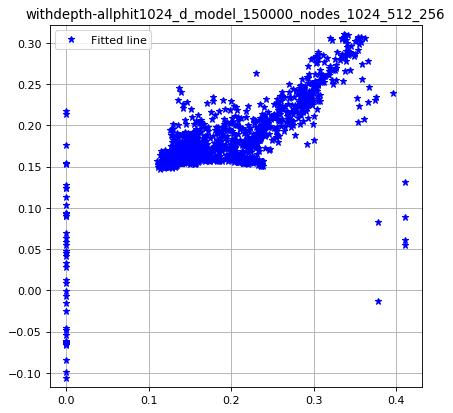

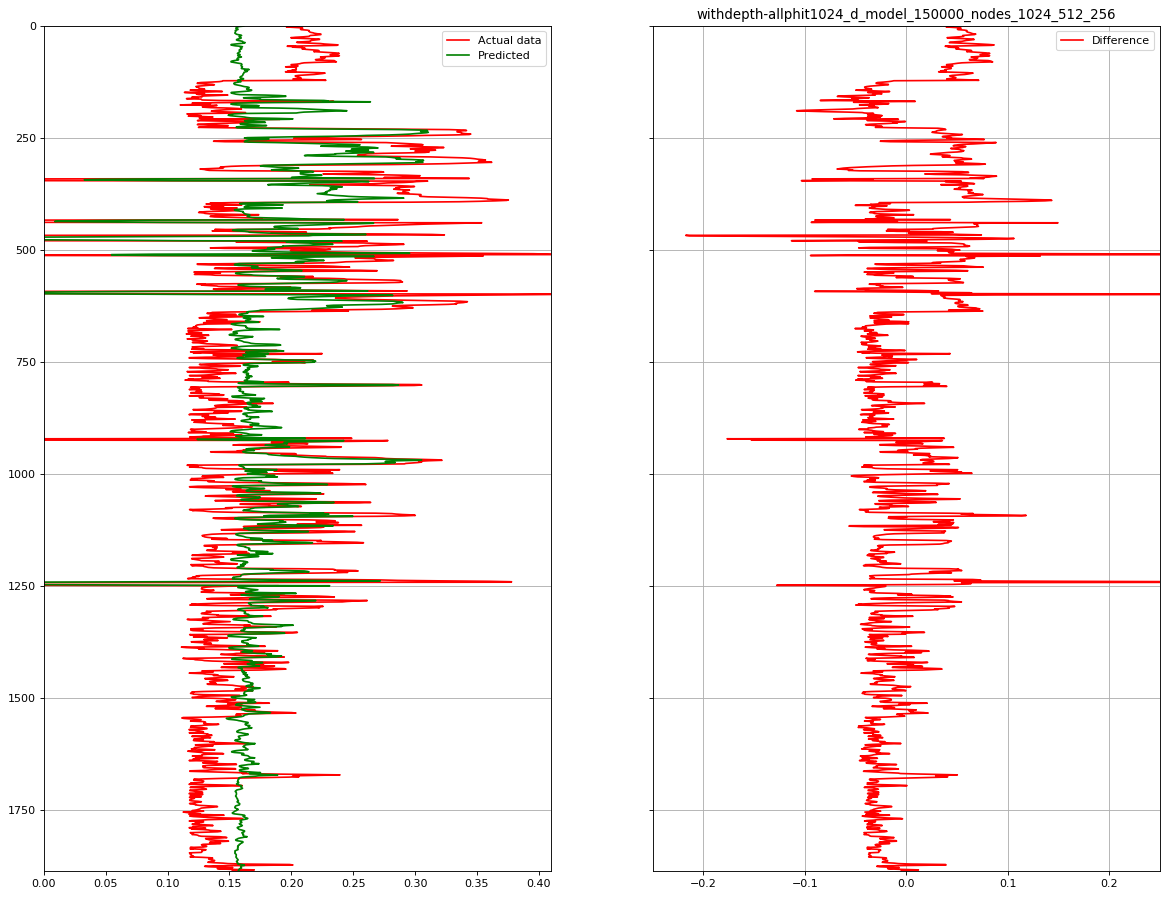

In [21]:
fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), dpi= 80, sharey=True)
# with ax_ as ax1:
ax1.plot(Y_train_inv, Y_pred_inv,'b*', label='Fitted line')
ax1.legend()
ax1.axis('equal')
ax1.grid(True)
plt.title(imname)
plt.show() #5000 epochs, 1024

fig1.savefig(imname+'_scatter.png', dpi=100)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 14), dpi= 80, sharey=True)
i=0
perc_diff=(-Y_pred_inv+Y_train_inv)
for axes in ax:
    if(i==0):
        axes.plot( Y_train_inv,range(len(Y_train)), label="Actual data",color='red')
        axes.plot( Y_pred_inv,range(len(Y_pred)), label="Predicted",color='green')
        axes.set_xlim (min(Y_train_inv),max(Y_train_inv))
    else:
        axes.plot(perc_diff  ,range(len(perc_diff)), label="Difference",color='red')
        axes.set_xlim (-.25,+.25)
        axes.xaxis.grid(True)
#         axes.plot( Y_pred,range(len(Y_pred)), label="Predicted",color='green')
    i+=1
    axes.set_ylim (0,len(Y_train_inv))
    axes.legend()
    axes.invert_yaxis()
    axes.yaxis.grid(True)
plt.title(imname)
plt.show()  #5000 epochs, 1024
fig.savefig(imname+'_log.png', dpi=100)

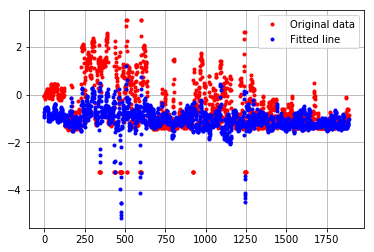

In [217]:
# %matplotlib inline
# from matplotlib import pyplot as plt
# Y_train=prediction_set[LABEL].values
# Y_pred=np.array([p[0] for p in predictions])
#     #Graphic display
plt.plot(range(len(Y_train)), Y_train, 'r.', label='Original data')
plt.plot(range(len(Y_train)), Y_pred,'b.', label='Fitted line')
# plt.plot(Y_train, Y_pred,'b*', label='Fitted line')
plt.legend()
# plt.axis([-2, 3, -2, 3])
# plt.axis('equal')
plt.grid(True)
plt.show()

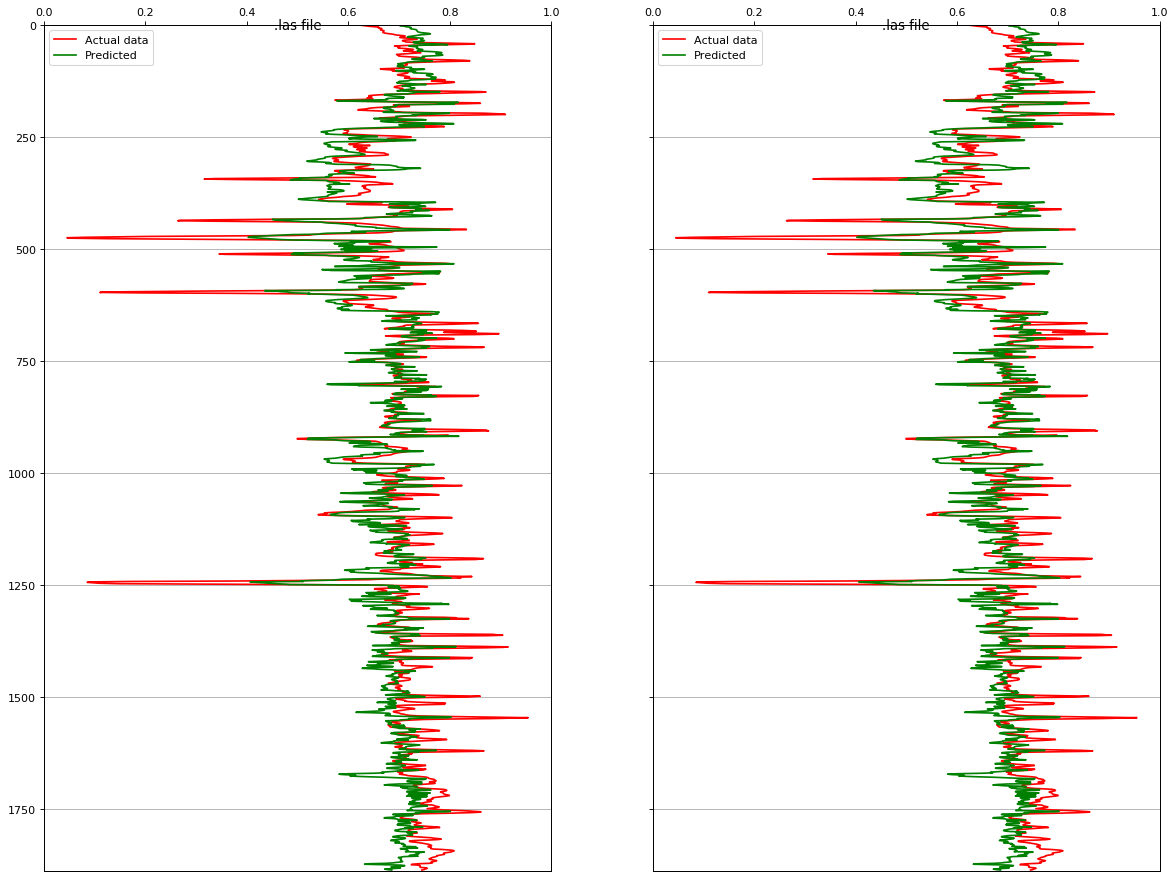

In [109]:
%matplotlib inline
from matplotlib import pyplot as plt
# Y_train,Y_pred
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 14), dpi= 80, sharey=True)
for axes in ax:
    axes.plot( Y_train,range(len(Y_train)), label="Actual data",color='red')
    axes.plot( Y_pred,range(len(Y_pred)), label="Predicted",color='green')
    axes.set_ylim (0,len(Y_train))
    axes.legend()
    axes.invert_yaxis()
    axes.yaxis.grid(True)
    axes.get_xaxis().set_visible(False) 
    axes.set_title('.las file',verticalalignment='top')
    axes.spines['top'].set_position(('outward',0))
    axes.set_xlabel("hi")
    axes.twiny()
    
    
plt.show()


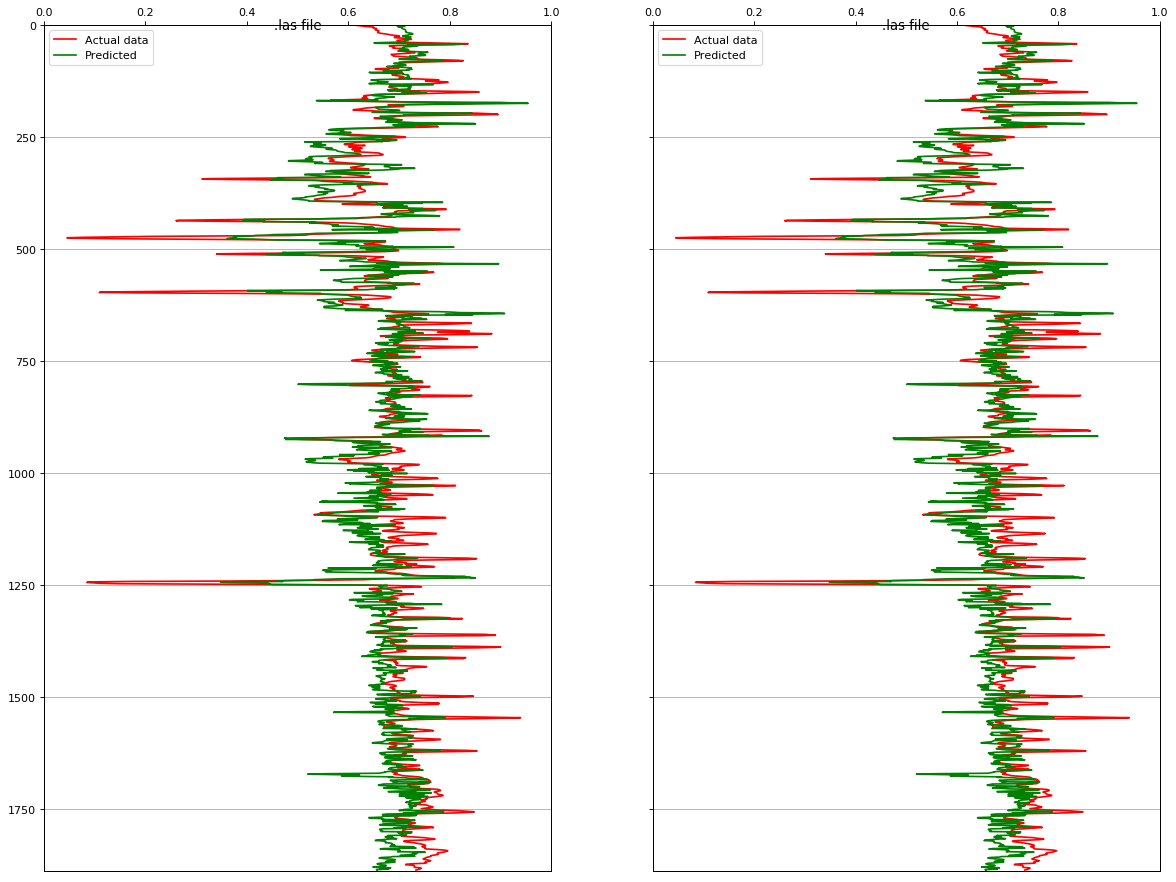

In [111]:
Y_train=prediction_set[LABEL].values
Y_pred=np.array([p[0] for p in predictions])
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 14), dpi= 80, sharey=True)
for axes in ax:
    axes.plot( Y_train,range(len(Y_train)), label="Actual data",color='red')
    axes.plot( Y_pred,range(len(Y_pred)), label="Predicted",color='green')
    axes.set_ylim (0,len(Y_train))
    axes.legend()
    axes.invert_yaxis()
    axes.yaxis.grid(True)
    axes.get_xaxis().set_visible(False) 
    axes.set_title('.las file',verticalalignment='top')
    axes.spines['top'].set_position(('outward',0))
    axes.set_xlabel("hi")
    axes.twiny()
    
    
plt.show()